# Infinite Monkey Theorem

Here’s a self check that really covers everything so far. You may have heard of the infinite monkey theorem? The theorem states that a monkey hitting keys at random on a typewriter keyboard for an infinite amount of time will almost surely type a given text, such as the complete works of William Shakespeare. Well, suppose we replace a monkey with a Python function. How long do you think it would take for a Python function to generate just one sentence of Shakespeare? The sentence we’ll shoot for is: “methinks it is like a weasel”

You’re not going to want to run this one in the browser, so fire up your favorite Python IDE. The way we’ll simulate this is to write a function that generates a string that is 28 characters long by choosing random letters from the 26 letters in the alphabet plus the space. We’ll write another function that will score each generated string by comparing the randomly generated string to the goal.

A third function will repeatedly call generate and score, then if 100% of the letters are correct we are done. If the letters are not correct then we will generate a whole new string. To make it easier to follow your program’s progress this third function should print out the best string generated so far and its score every 1,000 tries.

In [1]:
import string
import random

alphabet = string.ascii_lowercase + ' '

def generate(strlength):
    return ''.join(random.choices(alphabet, k = strlength))

def score(string, answer):
    return sum([1 for i in range(len(string)) if string[i] == answer[i]])

def trials(n, answer):
    best_score = 0
    best_string = ''
    for i in range(n):
        new_string = generate(len(answer))
        new_score = score(new_string, answer)
        if new_score > best_score:
            best_score = new_score
            best_string = new_string
        if (i % 1000) == 0:
            print(best_score, best_string)
            
trials(10000, "methinks it is like a weasel")

2 hmtzochj vrwjxhsahcqhdcifdrf
5 nmphnnlzmexbmuzljocfuwdlauep
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l
6 mybijphd  ibsswvdvevl yuwl l


See if you can improve upon the program in the self check by keeping letters that are correct and only modifying one character in the best string so far. This is a type of algorithm in the class of ‘hill climbing’ algorithms, that is we only keep the result if it is better than the previous one.

In [2]:
def better_generate(answer):
    string = generate(len(answer))
    count = 0
    for i in range(len(answer)):
        while string[i] != answer[i]:
            list_string = list(string)
            list_string[i] = generate(1)
            string = ''.join(list_string)
            count += 1
    return string, answer, count

better_generate("methinks it is like a weasel")

('methinks it is like a weasel', 'methinks it is like a weasel', 696)

# Fractions

To make sure you understand how operators are implemented in Python classes, and how to properly write methods, write some methods to implement *, /, and - . Also implement comparison operators > and <

In [3]:
def gcd(m,n):
    while m%n != 0:
        oldm = m
        oldn = n

        m = oldn
        n = oldm%oldn
    return n

class Fraction:
    def __init__(self,top,bottom):
        self.num = top
        self.den = bottom
    
    def __str__(self):
        return str(self.num) + "/" + str(self.den)

    def show(self):
        print(self.num, "/", self.den)
        
    def getNum(self):
        return self.num
    
    def getDen(self):
        return self.den

    def __add__(self, other):
        newnum = self.num * other.den + self.den * other.num
        newden = self.den * other.den
        common = gcd(newnum,newden)
        return Fraction(newnum // common, newden // common)

    def __eq__(self, other):
        firstnum = self.num * other.den
        secondnum = other.num * self.den
        return firstnum == secondnum
    
    def __mul__(self, other):
        newnum = self.num * other.num 
        newden = self.den * other.den
        common = gcd(newnum, newden)
        return Fraction(newnum // common, newden // common)
    
    def __truediv__(self, other):
        return Fraction.__mul__(self, Fraction(other.den, other.num))
    
    def __sub__(self, other):
        return Fraction.__add__(self, Fraction(-other.num, other.den))
    
    def __gt__(self, other):
        return Fraction.__sub__(self, other).num > 0
    
    def __lt__(self, other):
        return Fraction.__sub__(self, other).num < 0

In [4]:
x = Fraction(1,2)
y = Fraction(2,3)
print(x + y)
print(x == y)
print(x * y)
print(x / y)
print(x - y)
print(x > y)
print(x < y)

7/6
False
1/3
3/4
-1/6
False
True


# Logic Gates and Circuits

Create a two new gate classes, one called NorGate the other called NandGate. NandGates work like AndGates that have a Not attached to the output. NorGates work lake OrGates that have a Not attached to the output.

Create a series of gates that prove the following equality NOT (( A and B) or (C and D)) is that same as NOT( A and B ) and NOT (C and D). Make sure to use some of your new gates in the simulation.

In [5]:
class LogicGate:

    def __init__(self,n):
        self.name = n
        self.output = None

    def getName(self):
        return self.name

    def getOutput(self):
        self.output = self.performGateLogic()
        return self.output

class BinaryGate(LogicGate):

    def __init__(self,n):
        LogicGate.__init__(self,n)

        self.pinA = None
        self.pinB = None

    def getPinA(self):
        if self.pinA == None:
            return int(input("Enter Pin A input for gate "+self.getName()+"-->"))
        else:
            return self.pinA.getFrom().getOutput()

    def getPinB(self):
        if self.pinB == None:
            return int(input("Enter Pin B input for gate "+self.getName()+"-->"))
        else:
            return self.pinB.getFrom().getOutput()

    def setNextPin(self,source):
        if self.pinA == None:
            self.pinA = source
        else:
            if self.pinB == None:
                self.pinB = source
            else:
                print("Cannot Connect: NO EMPTY PINS on this gate")

class AndGate(BinaryGate):

    def __init__(self,n):
        BinaryGate.__init__(self,n)

    def performGateLogic(self):

        a = self.getPinA()
        b = self.getPinB()
        if a==1 and b==1:
            return 1
        else:
            return 0

class OrGate(BinaryGate):

    def __init__(self,n):
        BinaryGate.__init__(self,n)

    def performGateLogic(self):

        a = self.getPinA()
        b = self.getPinB()
        if a ==1 or b==1:
            return 1
        else:
            return 0

class UnaryGate(LogicGate):

    def __init__(self,n):
        LogicGate.__init__(self,n)

        self.pin = None

    def getPin(self):
        if self.pin == None:
            return int(input("Enter Pin input for gate "+self.getName()+"-->"))
        else:
            return self.pin.getFrom().getOutput()

    def setNextPin(self,source):
        if self.pin == None:
            self.pin = source
        else:
            print("Cannot Connect: NO EMPTY PINS on this gate")

class NotGate(UnaryGate):

    def __init__(self,n):
        UnaryGate.__init__(self,n)

    def performGateLogic(self):
        if self.getPin():
            return 0
        else:
            return 1

class Connector:

    def __init__(self, fgate, tgate):
        self.fromgate = fgate
        self.togate = tgate

        tgate.setNextPin(self)

    def getFrom(self):
        return self.fromgate

    def getTo(self):
        return self.togate
    
class NandGate(BinaryGate):
    
    def __init__(self,n):
        BinaryGate.__init__(self,n)
        
    def performGateLogic(self):
        andgate = AndGate(self.name)
        notgate = NotGate(self.name)
        Connector(andgate, notgate)
        return notgate.performGateLogic()
    
class NorGate(BinaryGate):
    
    def __init__(self,n):
        BinaryGate.__init__(self,n)
        
    def performGateLogic(self):
        orgate = OrGate(self.name)
        notgate = NotGate(self.name)
        Connector(orgate, notgate)
        return notgate.performGateLogic()


In [6]:
def main():
    g1 = AndGate("G1")
    g2 = AndGate("G2")
    g3 = OrGate("G3")
    g4 = NotGate("G4")
    c1 = Connector(g1,g3)
    c2 = Connector(g2,g3)
    c3 = Connector(g3,g4)
    print(g4.getOutput())
    
    g1 = NandGate("G1")
    g2 = NandGate("G2")
    g3 = AndGate("G3")
    c1 = Connector(g1,g3)
    c2 = Connector(g2,g3)
    print(g3.getOutput())

main()

Enter Pin A input for gate G1-->0
Enter Pin B input for gate G1-->1
Enter Pin A input for gate G2-->1
Enter Pin B input for gate G2-->1
0
Enter Pin A input for gate G1-->0
Enter Pin B input for gate G1-->1
Enter Pin A input for gate G2-->1
Enter Pin B input for gate G2-->1
0


# Minimum Number in a List

Write two Python functions to find the minimum number in a list. The first function should compare each number to every other number on the list `O(n^2)`. The second function should be linear `O(n)`.

In [7]:
def minimum_n2(seq):
    minimum = seq[0]
    for s in seq:
        for t in seq:
            if s <= t:
                pass
            else:
                break
            minimum = s
    return minimum

def minimum_n(seq):
    minimum = seq[0]
    for s in seq:
        if s <= minimum:
            minimum = s
    return minimum

In [8]:
x = [1,2,3,4,5,0,12,-1,-2,-3]
print(minimum_n2(x))
print(minimum_n(x))

-3
-3


# List Indexing

Devise an experiment to verify that the list index operator is `O(1)`.

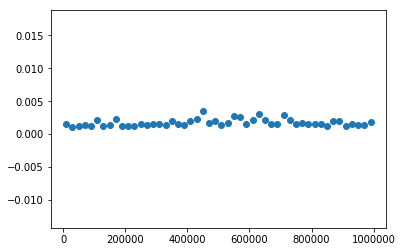

In [9]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

y = []
x = range(10000, 1000001, 20000)
for xx in x:
    seq = list(range(xx))
    t = timeit.Timer("seq[random.randrange(%d)]" %xx, "from __main__ import random, seq")
    time = t.timeit(number=1000)
    y.append(time)

plt.scatter(x, y)
plt.show()

# Stacks and String Reversal

Write a function `revstring(mystr)` that uses a stack to reverse the characters in a string.

In [10]:
class Stack:
    def __init__(self):
        self.items = []
    
    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)
    
def revstring(mystr):
    m = Stack()
    revstr = ''
    for s in mystr:
        m.push(s)
    while not m.isEmpty():
        revstr += m.pop()
    return revstr

revstring('apple')

'elppa'

# General Infix-to-Postfix Conversion¶

Modify the `infixToPostfix` function so that it can convert the following expression: `5 * 3 ** (4 - 2)`

In [11]:
def infixToPostfix(infixexpr):
    prec = {}
    prec["**"] = 4
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1
    opStack = Stack()
    postfixList = []
    tokenList = infixexpr.split()

    for token in tokenList:
        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or token in "0123456789":
            postfixList.append(token)
        elif token == '(':
            opStack.push(token)
        elif token == ')':
            topToken = opStack.pop()
            while topToken != '(':
                postfixList.append(topToken)
                topToken = opStack.pop()
        else:
            while (not opStack.isEmpty()) and (prec[opStack.peek()] >= prec[token]):
                postfixList.append(opStack.pop())
            opStack.push(token)

    while not opStack.isEmpty():
        postfixList.append(opStack.pop())
    return " ".join(postfixList)

print(infixToPostfix("A * B + C * D"))
print(infixToPostfix("( A + B ) * C - ( D - E ) * ( F + G )"))
print(infixToPostfix("5 * 3 ** ( 4 - 2 )"))

A B * C D * +
A B + C * D E - F G + * -
5 3 4 2 - ** *


# Printer Queue Simulation

How would you modify the printer simulation to reflect a larger number of students? Suppose that the number of students was doubled. You make need to make some reasonable assumptions about how this simulation was put together but what would you change? Modify the code. 

Also, suppose that the length of the average print task was cut in half. Change the code to reflect that change. Finally, how would you parametertize the number of students? Rather than changing the code we would like to make the number of students a parameter of the simulation.

In [12]:
import random

class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)
    
class Printer:
    def __init__(self, ppm):
        self.pagerate = ppm
        self.currentTask = None
        self.timeRemaining = 0

    def tick(self):
        if self.currentTask != None:
            self.timeRemaining = self.timeRemaining - 1
            if self.timeRemaining <= 0:
                self.currentTask = None

    def busy(self):
        if self.currentTask != None:
            return True
        else:
            return False

    def startNext(self, newtask):
        self.currentTask = newtask
        self.timeRemaining = newtask.getPages() * 60 / self.pagerate
        
class Task:
    def __init__(self, time, averagePageLength):
        self.timestamp = time
        self.pages = random.randrange(1, averagePageLength + 1)

    def getStamp(self):
        return self.timestamp

    def getPages(self):
        return self.pages

    def waitTime(self, currenttime):
        return currenttime - self.timestamp
    
def simulation(numSeconds, pagesPerMinute, students, averagePageLength):

    labprinter = Printer(pagesPerMinute)
    printQueue = Queue()
    waitingtimes = []

    for currentSecond in range(numSeconds):
        if newPrintTask(students):
            task = Task(currentSecond, averagePageLength)
            printQueue.enqueue(task)

        if (not labprinter.busy()) and (not printQueue.isEmpty()):
            nexttask = printQueue.dequeue()
            waitingtimes.append(nexttask.waitTime(currentSecond))
            labprinter.startNext(nexttask)
      
        labprinter.tick()

    averageWait = sum(waitingtimes) / len(waitingtimes)
    print("Average Wait %6.2f secs %3d tasks remaining."%(averageWait, printQueue.size()))


def newPrintTask(students):
    tasksPerStudent = 2
    secondsPerTask = 3600 / (students * tasksPerStudent)
    num = random.randrange(1, 180 + 1)
    if num == 180:
        return True
    else:
        return False

for i in range(10):
    simulation(3600, 5, 10, 10)

Average Wait  22.10 secs   0 tasks remaining.
Average Wait   9.11 secs   0 tasks remaining.
Average Wait  11.46 secs   0 tasks remaining.
Average Wait  15.43 secs   0 tasks remaining.
Average Wait  55.48 secs   0 tasks remaining.
Average Wait  11.86 secs   0 tasks remaining.
Average Wait   9.67 secs   0 tasks remaining.
Average Wait  33.44 secs   0 tasks remaining.
Average Wait  18.92 secs   0 tasks remaining.
Average Wait   2.25 secs   0 tasks remaining.


# Deque

In [14]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

# Implementing an Unordered List: Linked Lists

Part I: Implement the append method for UnorderedList. What is the time complexity of the method you created?

Part II: In the previous problem, you most likely created an append method that was O(n). If you add an instance variable to the UnorderedList class you can create an append method that is O(1). Modify your append method to be O(1). Be Careful! To really do this correctly you will need to consider a couple of special cases that may require you to make a modification to the add method as well.

In [32]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext


class UnorderedList:

    def __init__(self):
        self.head = None

    def isEmpty(self):
        return self.head == None

    def add(self,item):
        temp = Node(item)
        if self.head == None:
            temp.setNext(self.tail)
        else:
            temp.setNext(self.head)
        self.head = temp

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count

    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found

    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
            
    def append(self,item):
        current = self.head
        end = False
        while not end:
            if current.getNext() == None:
                end = True
            else:
                current = current.getNext()
        temp = Node(item)
        current.setNext(temp)
        temp.setNext(None)
        
    def fastappend(self,item):
        temp = Node(item)
        temp.setNext(None)
        self.tail = temp
        

In [34]:
mylist = UnorderedList()

mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))

mylist.add(100)
print(mylist.search(100))
print(mylist.size())

mylist.remove(54)
print(mylist.size())
mylist.remove(93)
print(mylist.size())
mylist.remove(31)
print(mylist.size())
print(mylist.search(93))

mylist.append(1)
print(mylist.search(1))
mylist.remove(1)
print(mylist.search(1))
mylist.fastappend(2)
print(mylist.search(2))
# mylist.remove(2)
# print(mylist.search(2))

6
True
False
True
7
6
5
4
False
True
False
False
